In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [94]:
TC = pd.read_csv("C:\\Users\\marpaka pradeep sai\\Downloads\\ToyotaCorolla.csv", encoding= 'unicode_escape')
TC.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [95]:
# Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight

In [30]:
df = TC[["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight", "Price"]]
df

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


In [31]:
df = df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


# EDA

In [96]:
df.describe()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1436 non-null   int64
 1   KM      1436 non-null   int64
 2   HP      1436 non-null   int64
 3   CC      1436 non-null   int64
 4   Doors   1436 non-null   int64
 5   Gears   1436 non-null   int64
 6   QT      1436 non-null   int64
 7   Weight  1436 non-null   int64
 8   Price   1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [98]:
df.isnull().sum()

Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
Price     0
dtype: int64

# Correlation Matrix

In [99]:
df.corr()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
Age,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
CC,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
QT,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


# Scatterplot between variables

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

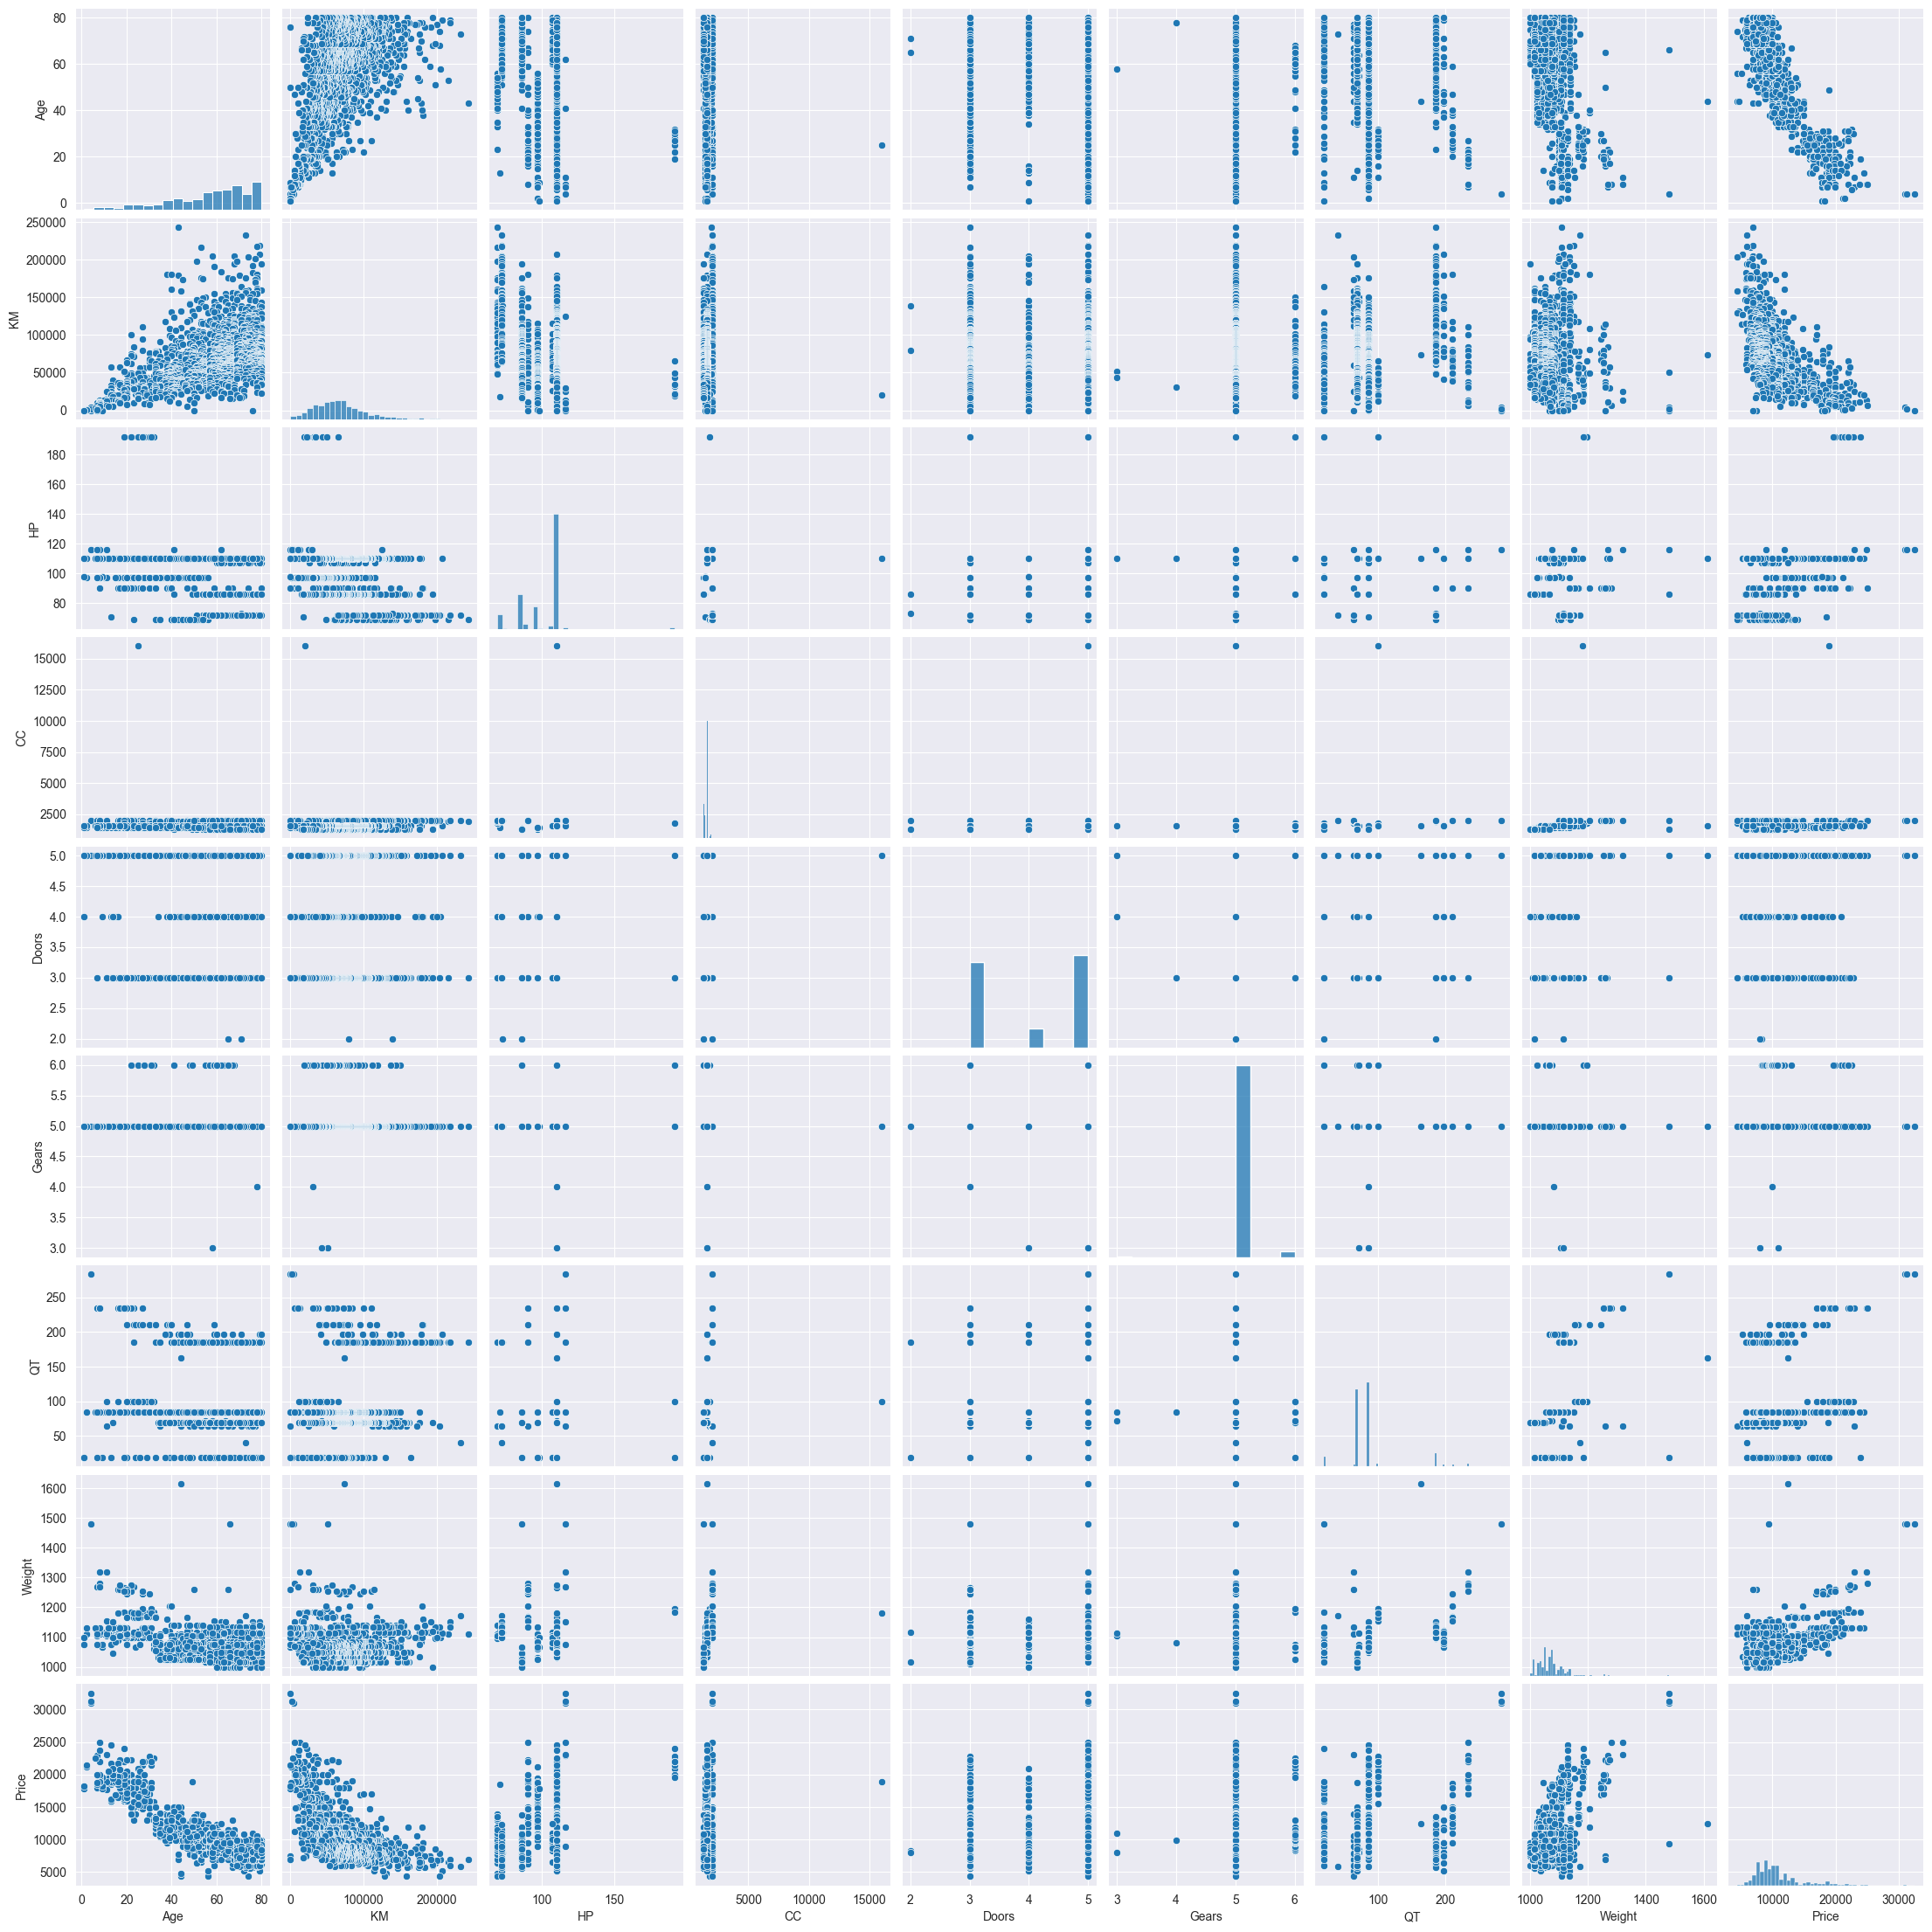

In [100]:
sns.set_style(style = 'darkgrid')
sns.pairplot(df)

# Preparing a Model

In [101]:
model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:32:00   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
print(model.params)

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64


In [108]:
np.round(model.pvalues,5)
# CC and Doors are insignificant variables

Intercept    0.00008
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.17909
Doors        0.96777
Gears        0.00261
QT           0.00262
Weight       0.00000
dtype: float64

In [107]:
# rsquared values
(model.rsquared, model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

#### Building SLR and MLR models for insignificant variables and finding their t and p values

# Simple Linear Regression Models

In [112]:
slr_cc = smf.ols('Price ~ CC', data = df).fit()
print(slr_cc.pvalues) # CC has significant Pvalue

Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


In [113]:
slr_doors = smf.ols('Price ~ Doors', data = df).fit()
print(slr_doors.pvalues) # Doors has significant Pvalue

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [115]:
mlr_cd = smf.ols('Price ~ CC + Doors', data = df).fit()
print(mlr_cd.pvalues) # CC and doors has significant Pvalue

Intercept    1.056885e-34
CC           1.521992e-05
Doors        1.373469e-11
dtype: float64


# Model Validation Techniques

## 1. Collinearity Check

In [116]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


### No variable has VIF > 10 i.e., No Collinearity

# 2. Residual Analysis

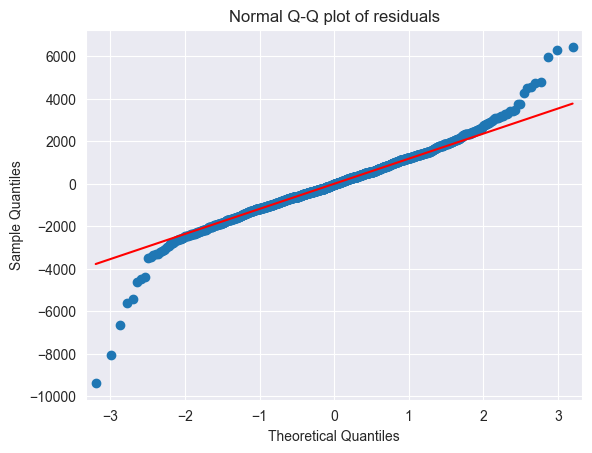

In [117]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [118]:
# Outlier detection
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [119]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

## Residual Plot for Homoscedasticity

In [120]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

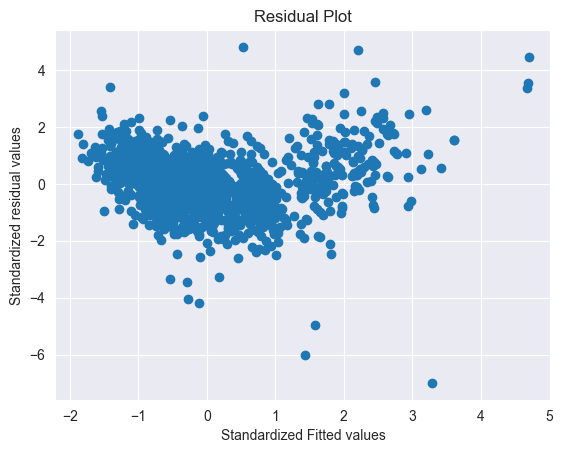

In [121]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressor

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


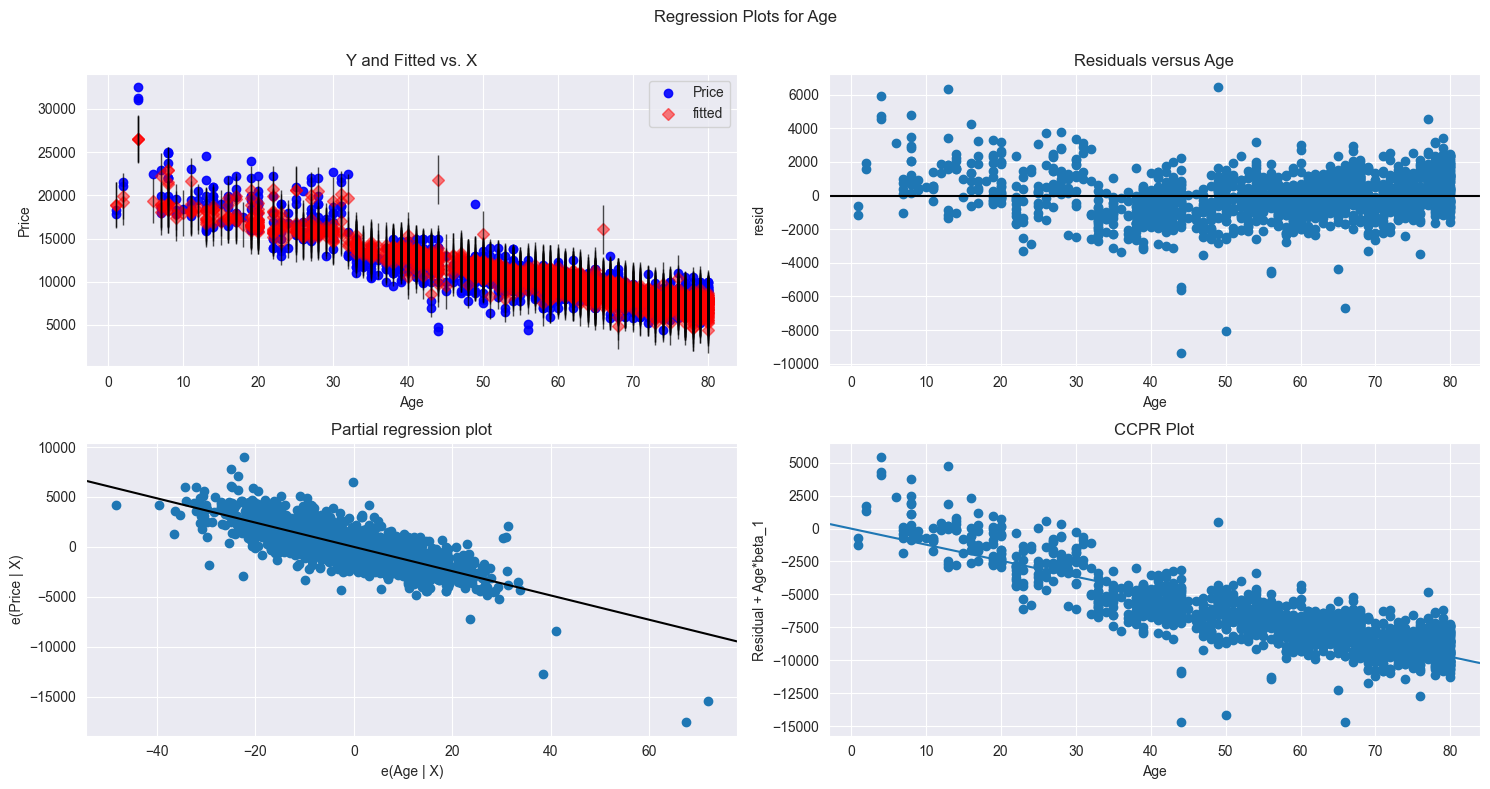

In [122]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

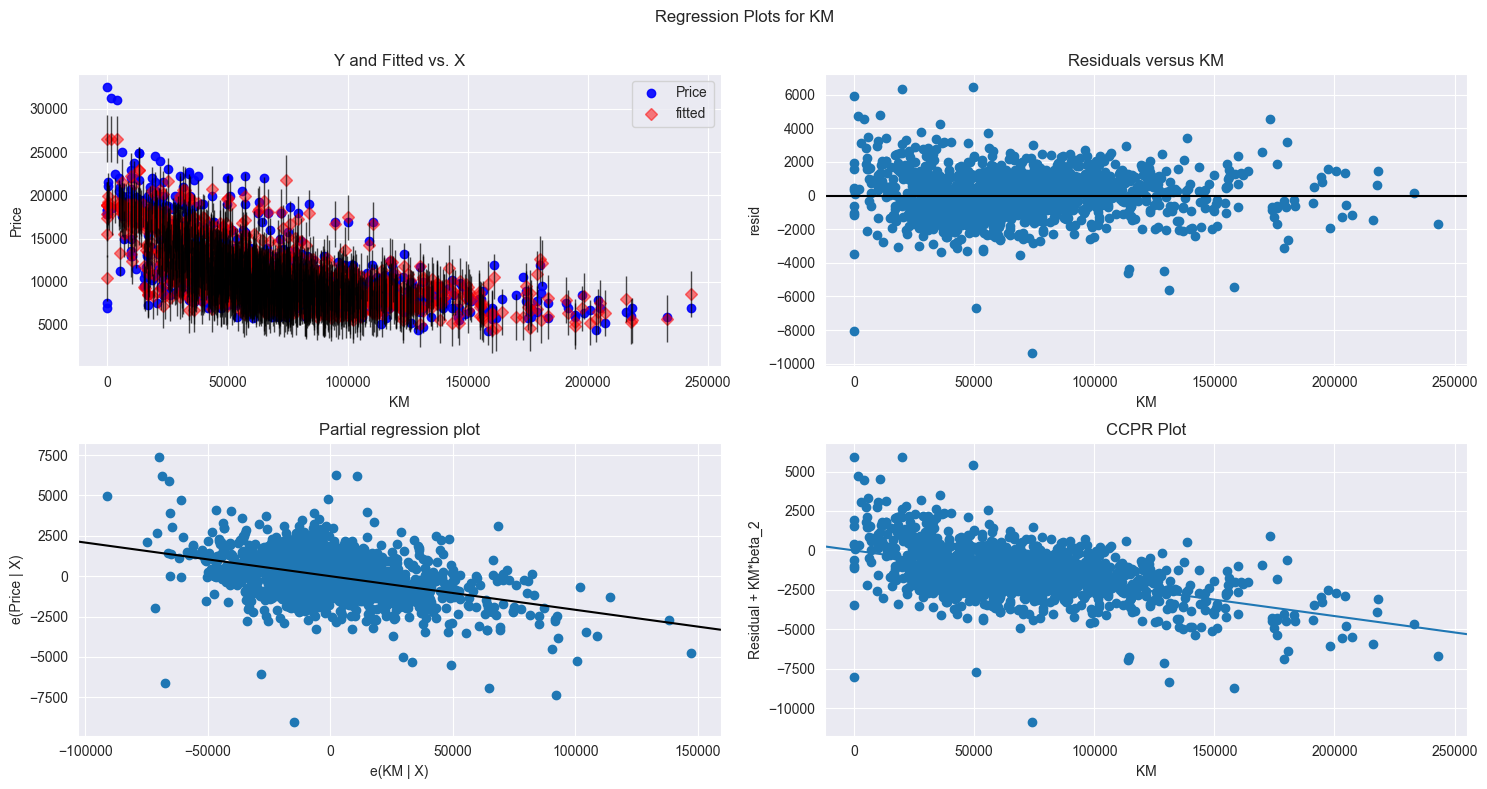

In [123]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

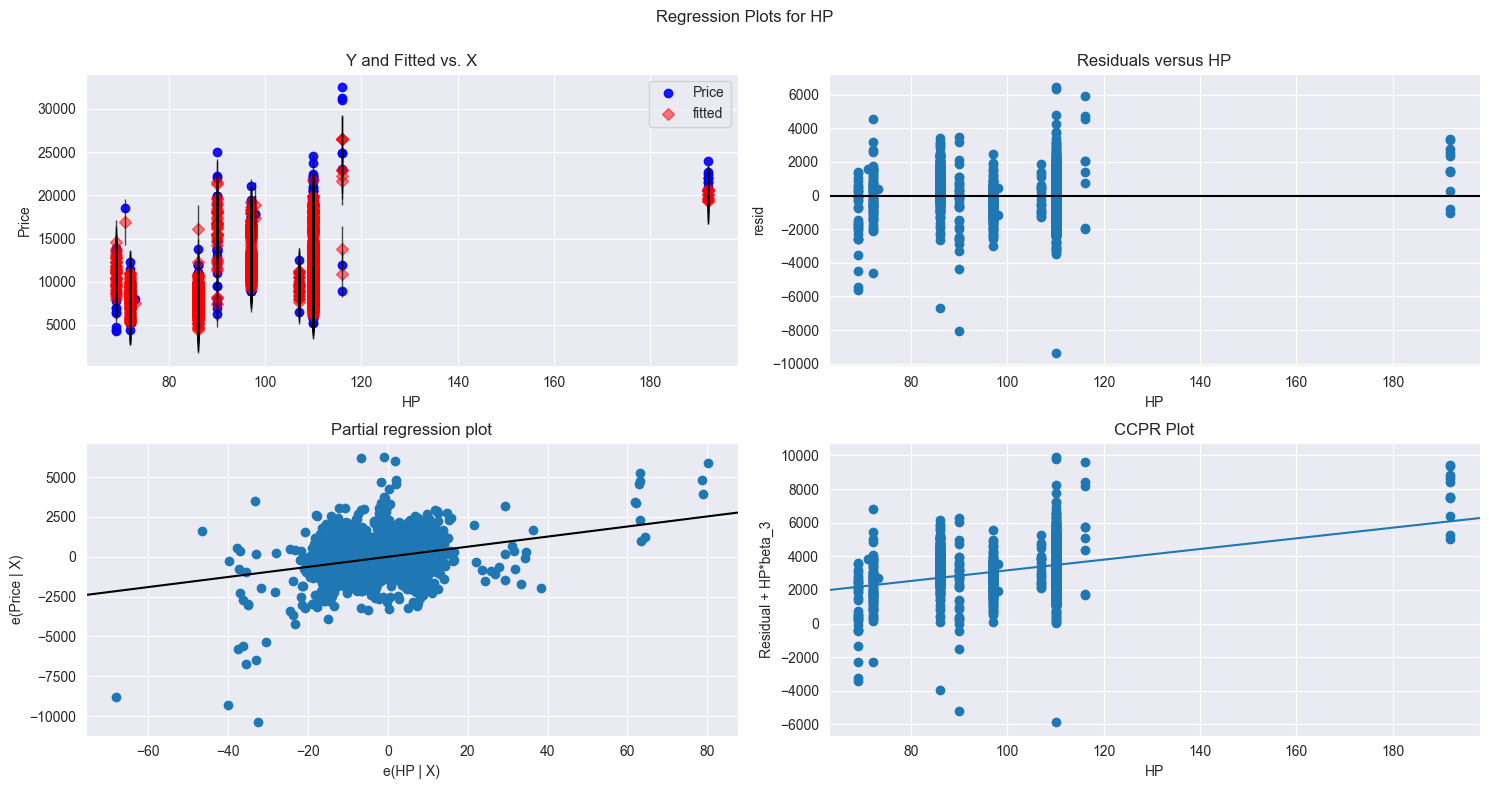

In [124]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

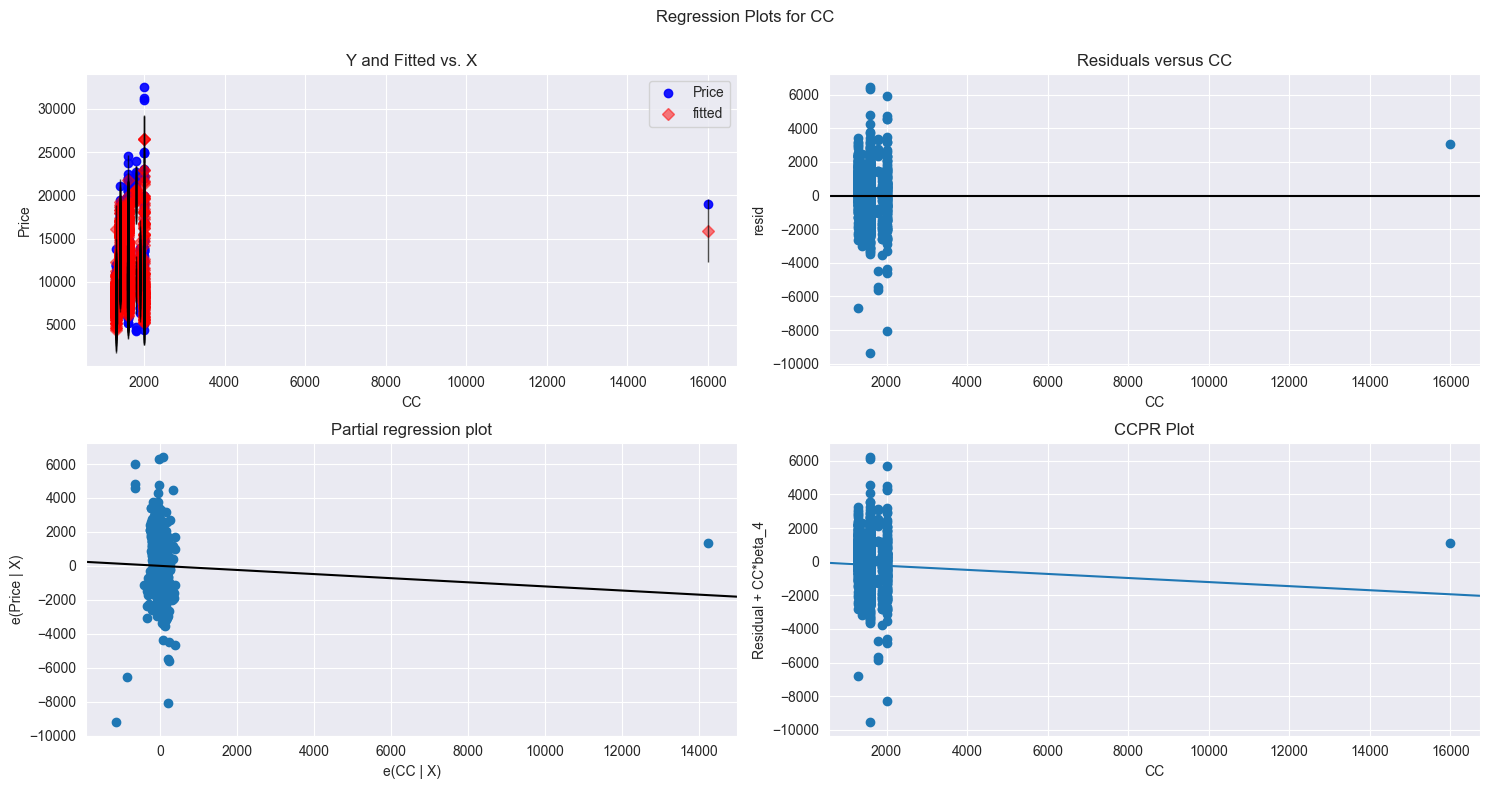

In [125]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

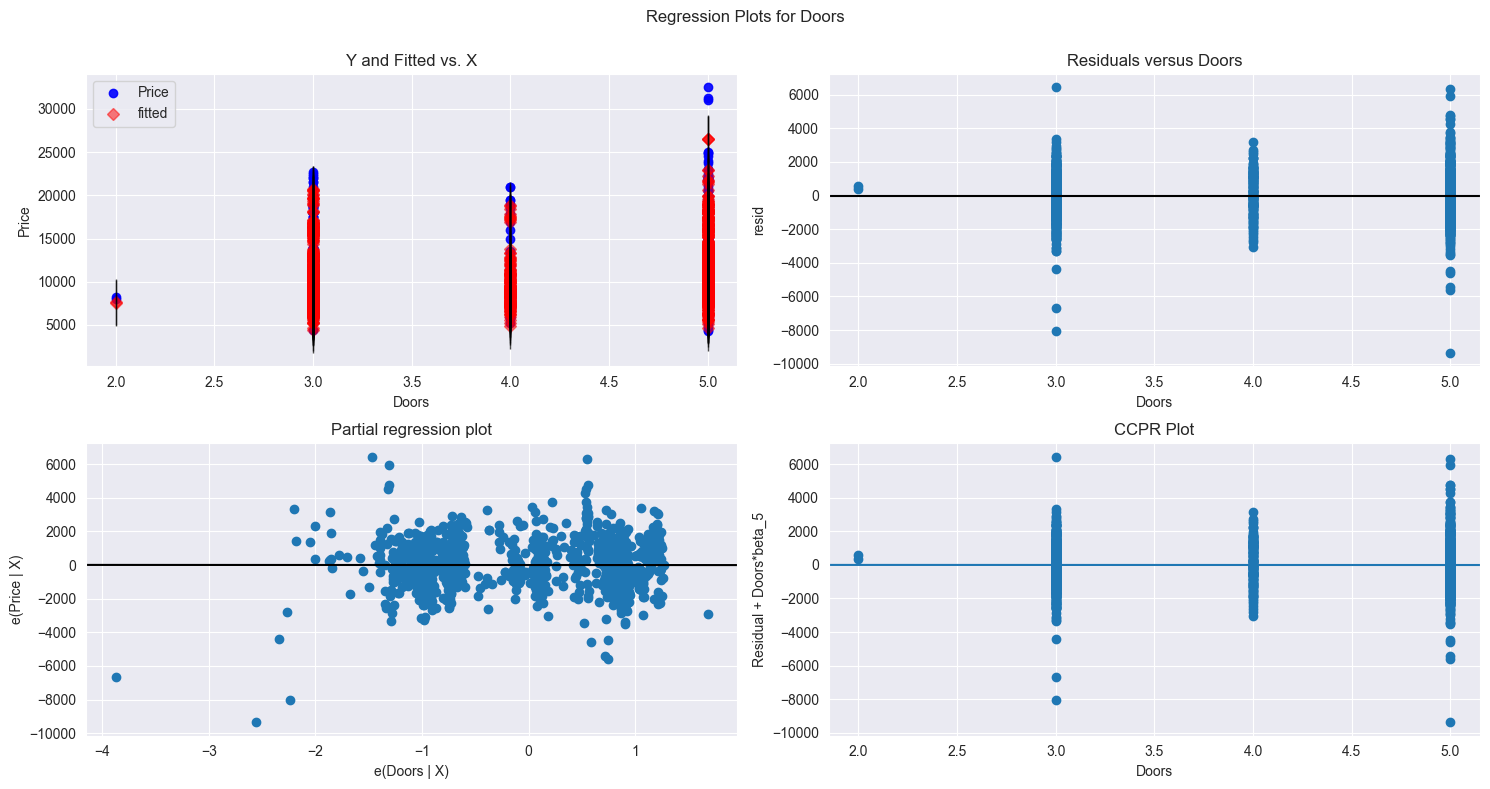

In [126]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

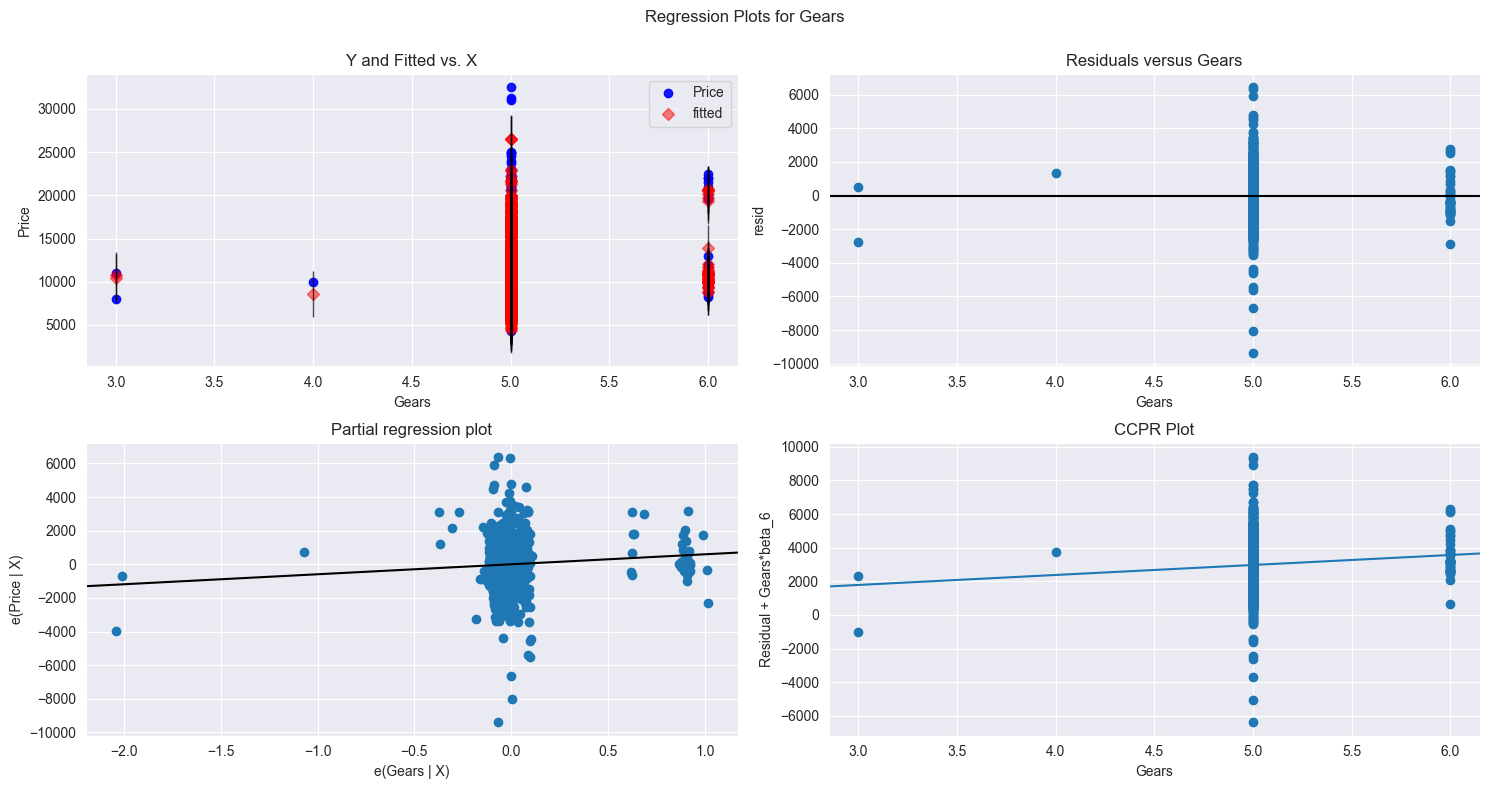

In [127]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

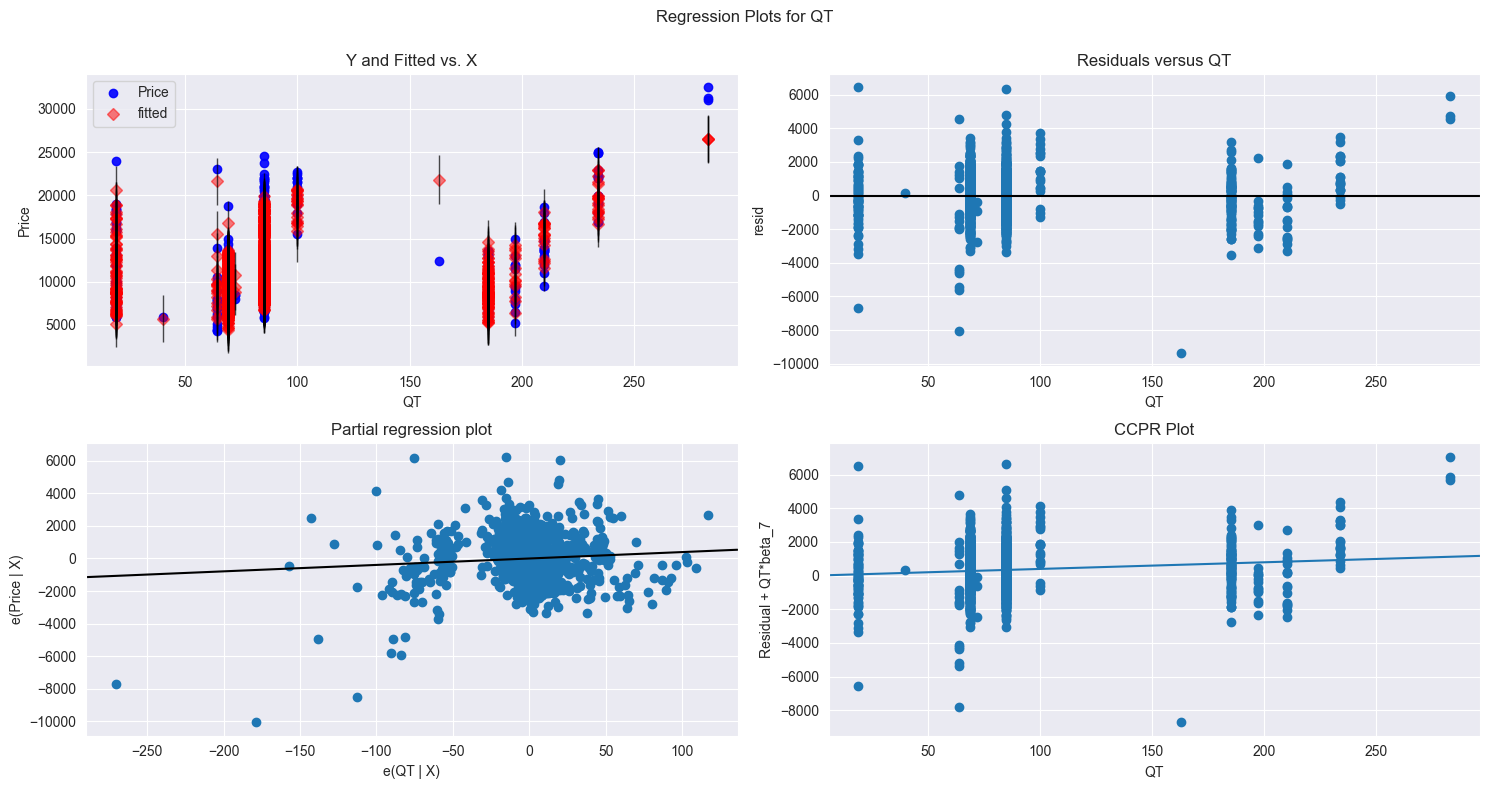

In [128]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

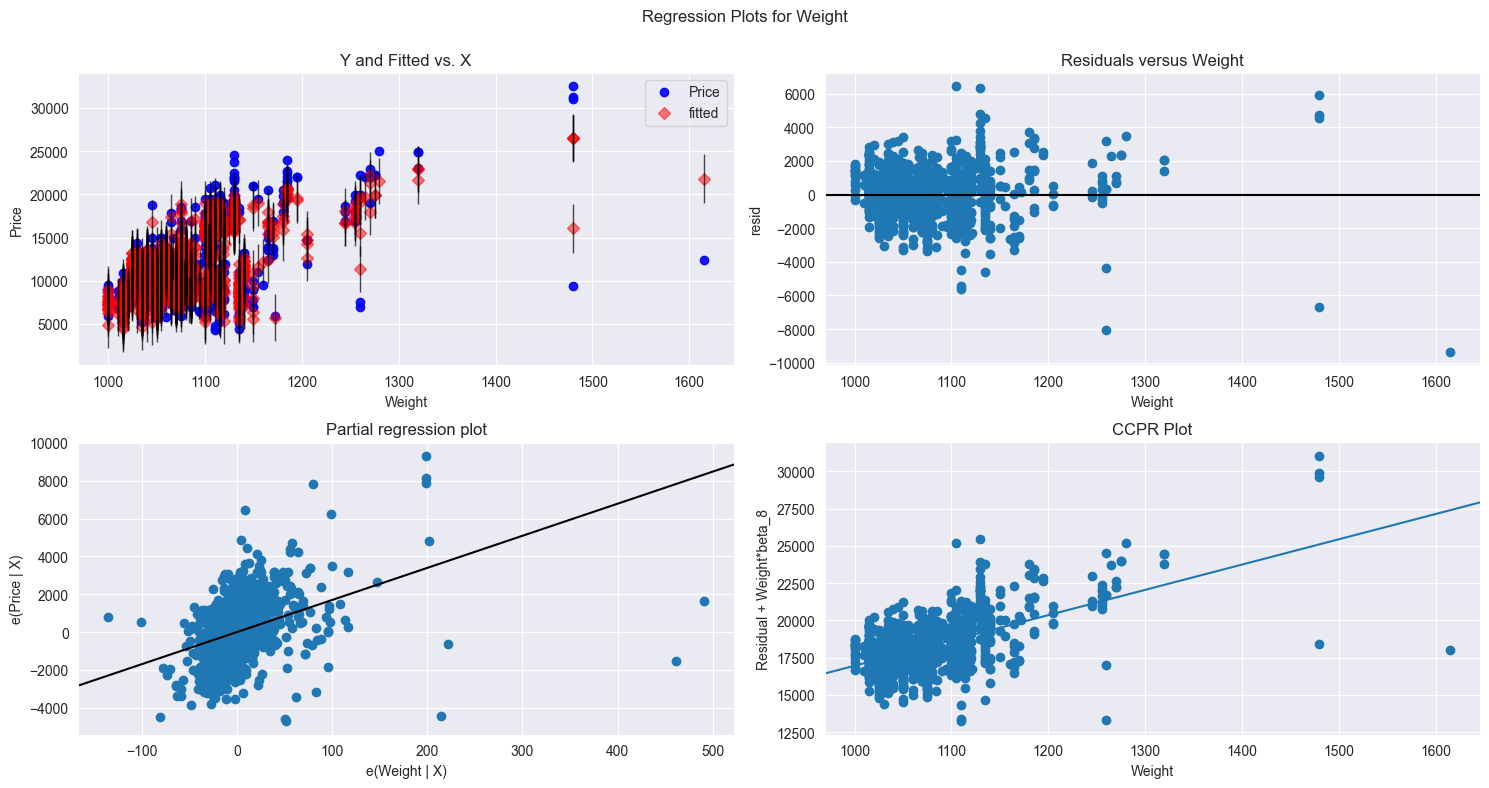

In [129]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

# Cook's Distance

In [131]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

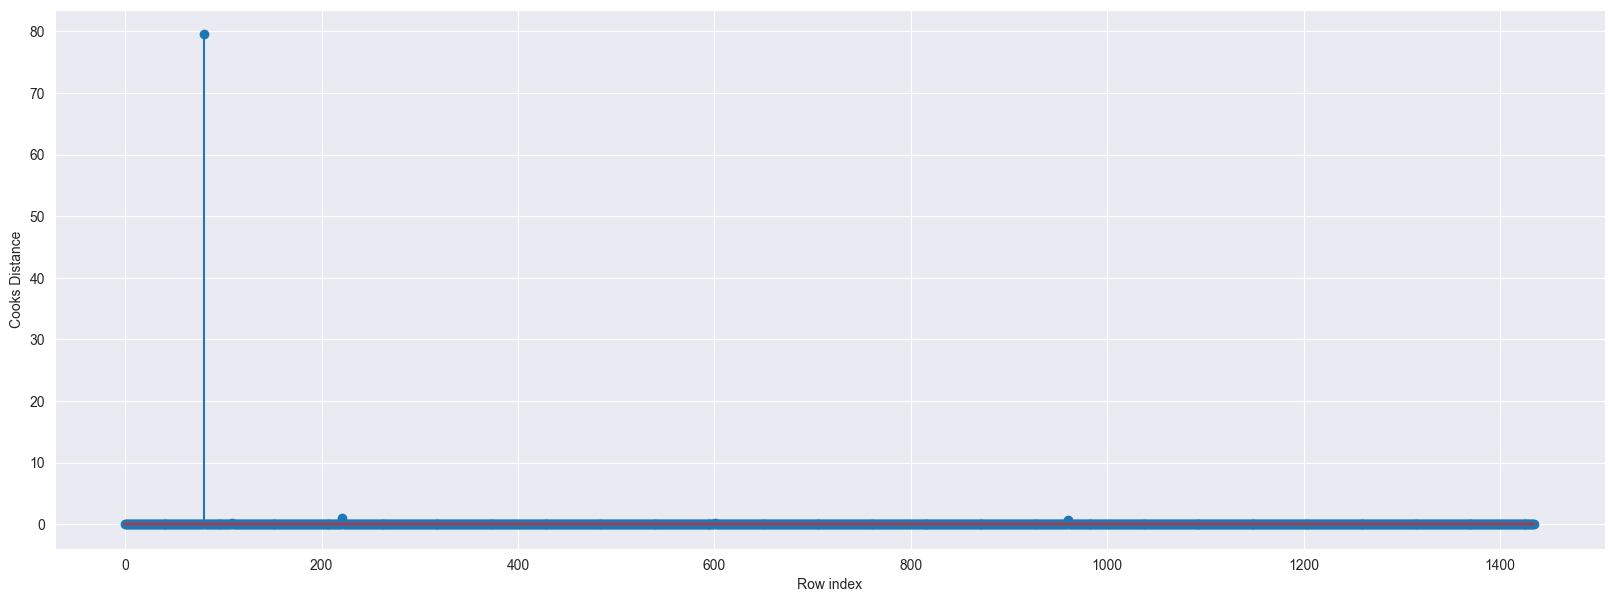

In [132]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [133]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624139086)

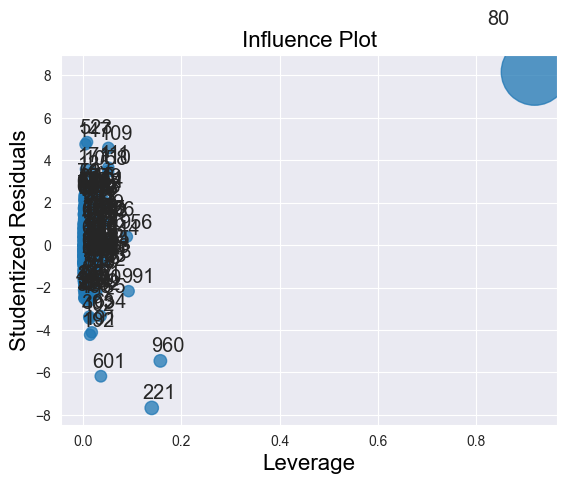

In [134]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [136]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020891364902506964

In [137]:
df[df.index.isin([80])]

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
80,25,20019,110,16000,5,5,100,1180,18950


# Improving the Model

In [138]:
# Creating a copy of data so that original dataset is not affected
df_new = df.copy()
df_new.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [139]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df1 = df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df1

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,3,5,69,1025,7500
1431,72,19000,86,1300,3,5,69,1015,10845
1432,71,17016,86,1300,3,5,69,1015,8500
1433,70,16916,86,1300,3,5,69,1015,7250


# Model Deletion Diagnostics and Final Model

In [172]:
if np.max(c)>0.5 :
    model=smf.ols('Price ~ Age +KM + HP + CC + Doors + Gears + QT + Weight',data=df1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df1 = df1.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df1
else:
    final_model=smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight',data = df1).fit()
    final_model.rsquared , final_model.aic
    print("The model accuracy is improved to",final_model.rsquared)

The model accuracy is improved to 0.8894191849749751


In [173]:
print(final_model.rsquared)

0.8894191849749751


In [174]:
df1

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1427,69,20544,86,1300,3,5,69,1025,7500
1428,72,19000,86,1300,3,5,69,1015,10845
1429,71,17016,86,1300,3,5,69,1015,8500
1430,70,16916,86,1300,3,5,69,1015,7250


# Model Predictions

In [175]:
# Predictions with new
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [176]:
final_model.predict(new_data)

0    14337.947064
dtype: float64

In [178]:
Price_pred = final_model.predict(df1)
Price_pred

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835927
            ...     
1427     9161.797882
1428     8536.169181
1429     8681.605150
1430     8793.704782
1431    10863.423359
Length: 1432, dtype: float64